<a href="https://colab.research.google.com/github/Ira-a02/DataAnalysis/blob/main/Hw2_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("mushrooms.csv")

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
le=LabelEncoder()
df = df.apply(le.fit_transform)

In [ ]:
X = df.drop(['class'] , axis = 1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state = 0 )
dt_model=dt.fit(X_train , y_train)
y_pred=dt_model.predict(X_test)

In [ ]:
print("Tree Accuracy", dt.score(X_test,y_test))

Tree Accuracy 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
rf_model = RandomForestClassifier(max_depth = 1)
rf_model.fit(X_train , y_train)
y_pred=rf_model.predict(X_test)

In [ ]:
print("Forest Accuracy", dt.score(X_test,y_test))

Forest Accuracy 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [ ]:
def max_depth_error(max_depths):
    model = DecisionTreeClassifier(max_depth=max_depths, random_state=42)
    model.fit(X_train, y_train)
    #y_pred=model.predict(X_test)
    training_error = 1 - model.score(X_train, y_train)
    validation_error = 1 - model.score(X_test, y_pred)
    return {"Max Depth": max_depths, "Training error": training_error, "Validation Error": validation_error}


max_depth_Df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)])
max_depth_Df

,Max Depth,Training error,Validation Error
0,1,0.208934,0.137408
1,2,0.086528,0.087367
2,3,0.040978,0.121411
3,4,0.021984,0.107465
4,5,0.020577,0.109106
5,6,0.001231,0.112387
6,7,0.000000,0.111977
7,8,0.000000,0.111977
8,9,0.000000,0.111977
9,10,0.000000,0.111977


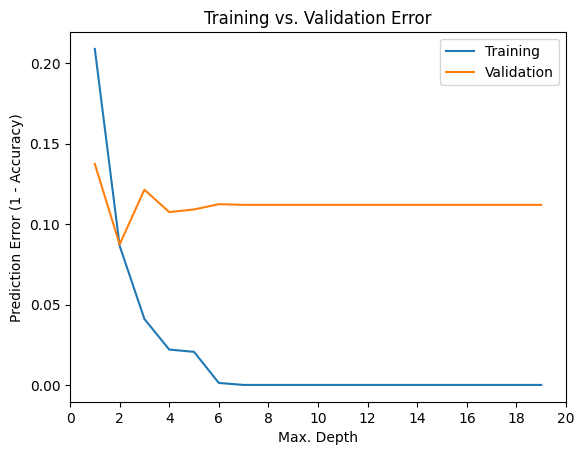

In [ ]:
plt.figure()
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Training error'])
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
dt = DecisionTreeClassifier(
    min_samples_split=5,
    min_samples_leaf=1,
                            )
dt_model=dt.fit(X_train , y_train)
y_pred=dt_model.predict(X_test)
print("Tree Accuracy", dt.score(X_test,y_test))


Tree Accuracy 1.0


In [ ]:
print("Tree Accuracy", dt.score(X_test,y_test))


Tree Accuracy 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
print("Tree Accuracy", dt.score(X_test,y_test))

Tree Accuracy 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

